## I- Génération du jeu de données synthétique

Cette première étape a pour but de simuler un jeu de données réaliste représentant les étudiants en cycle préparatoire, en tenant compte de leurs résultats académiques, informations personnelles et centres d’intérêt. Ce dataset servira ensuite pour entraîner un modèle de prédiction de la filière la plus adaptée à chaque profil.

In [ ]:
 

import pandas as pd
import numpy as np
import random

# Définir les paramètres
n_students = 6000
modules = [
    "Algebre1", "Analyse1", "Physique1_Meca", "Meca_Poin", "Informatique1",
    "LC1", "Algebre2", "Analyse2", "Physique2", "Chimie", "Informatique2", "LC2",
    "Algebre3", "Analyse3", "Meca2", "Electronique1", "Informatique3", "LC3",
    "Analyse4", "Math_Applique", "Physique3", "Physique4", "Electronique2", "LC4"
]
# Centres d'intérêt
interests = [
    "Programmation", "Reseaux_Cyber", "Data_AI", "Electronique_Embarque",
    "Genie_Proc", "Management_SI"
]
# Informations complémentaires
sexes = ["Homme", "Femme"]
geo_locations = ["Ville", "Campagne"]
statut_socio = ["Bas", "Moyen", "Élevé"]
orientation_lycee = ["Science Maths", "Science Physique", "SVT"]
mention_bac = ["Passable", "Assez Bien", "Bien", "Très Bien"]

# Coefficients par filière
coefficients = {
    "MGSI": [5, 5, 1, 1, 5, 2, 5, 5, 1, 1, 5, 2, 5, 5, 1, 1, 5, 2, 5, 5, 1, 1, 1, 2],
    "IRIC": [1, 1, 3, 1, 5, 2, 1, 1, 3, 1, 5, 2, 1, 1, 1, 3, 5, 2, 1, 1, 3, 3, 3, 2],
    "GP": [3, 3, 1, 7, 3, 2, 3, 3, 1, 7, 3, 2, 3, 3, 7, 1, 3, 2, 3, 3, 1, 1, 1, 2],
    "GE": [1, 1, 7, 1, 1, 2, 1, 1, 7, 1, 1, 2, 1, 1, 1, 7, 1, 2, 1, 1, 7, 7, 7, 2],
    "GI": [5, 5, 1, 1, 7, 2, 5, 5, 1, 1, 7, 2, 5, 5, 1, 1, 7, 2, 5, 5, 1, 1, 1, 2],
    "IID": [7, 7, 1, 1, 7, 2, 7, 7, 1, 1, 7, 2, 7, 7, 1, 1, 7, 2, 7, 7, 1, 1, 1, 2]
}
filiere_names = list(coefficients.keys())

# Fonction pour prédire la filière
def predict_filiere(notes, interests_scores):
    scores = {}
    for filiere in filiere_names:
        coef = coefficients[filiere]
        academic_score = np.dot(notes, coef) / sum(coef)
        interest_score = 0
        if filiere == "IID":
            interest_score = interests_scores[2]
        elif filiere == "GI":
            interest_score = interests_scores[0]
        elif filiere == "GE":
            interest_score = interests_scores[3]
        elif filiere == "GP":
            interest_score = interests_scores[4]
        elif filiere == "IRIC":
            interest_score = interests_scores[1]
        elif filiere == "MGSI":
            interest_score = interests_scores[5]
        total_score = 0.5*academic_score + 0.5*interest_score
        scores[filiere] = total_score
    return max(scores, key=scores.get)

# Génération du dataset
students = []

for _ in range(n_students):
    sexe = random.choice(sexes)
    age = random.randint(18, 22)
    geo = random.choice(geo_locations)
    statut = random.choice(statut_socio)
    orientation = random.choice(orientation_lycee)
    mention = random.choice(mention_bac)
    
    notes = np.clip(np.random.normal(14, 3, len(modules)), 8, 20)  # notes réalistes entre 5 et 20
    interests_scores = [random.randint(1, 5) for _ in interests]
    
    filiere = predict_filiere(notes, interests_scores)
    
    student = [sexe, age, geo, statut, orientation, mention] + list(notes) + interests_scores + [filiere]
    students.append(student)

# Création du DataFrame
columns = ["Sexe", "Age", "Situation_geo", "Statut_socio", "Orientation_Lycee", "Mention_Bac"] + modules + interests + ["Filiere"]
df = pd.DataFrame(students, columns=columns)

# Sauvegarde au format CSV
output_path = "students_dataset6.csv"
df.to_csv(output_path, index=False)
output_path



In [3]:
df = pd.read_csv("students_dataset6.csv")
df

,Sexe,Age,Situation_geo,Statut_socio,Orientation_Lycee,Mention_Bac,Algebre1,Analyse1,Physique1_Meca,Meca_Poin,...,Physique4,Electronique2,LC4,Programmation,Reseaux_Cyber,Data_AI,Electronique_Embarque,Genie_Proc,Management_SI,Filiere
0,Homme,20,Ville,Élevé,Science Maths,Passable,12.280137,12.766103,12.109897,11.592797,...,16.321572,14.878459,11.894626,5,5,3,3,3,3,GI
1,Femme,19,Campagne,Élevé,Science Maths,Passable,9.179366,8.062692,12.752300,13.656980,...,8.000000,17.677271,16.023758,2,2,2,5,5,3,GP
2,Homme,20,Ville,Moyen,Science Physique,Bien,17.720074,10.423503,12.302854,12.046342,...,14.542685,19.452530,16.217654,3,4,1,2,3,5,MGSI
3,Femme,18,Campagne,Bas,Science Maths,Passable,11.555645,12.082010,16.875138,15.064127,...,14.569765,13.933253,19.165562,5,5,2,3,5,1,IRIC
4,Homme,20,Campagne,Moyen,SVT,Très Bien,9.334553,11.956753,16.754547,11.167210,...,10.338855,10.935520,13.576135,4,2,5,4,5,2,IID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Femme,20,Ville,Élevé,Science Physique,Bien,13.079252,11.631526,12.515216,17.463770,...,12.414027,15.596648,11.198943,1,3,2,4,5,1,GP
5996,Homme,21,Campagne,Bas,Science Physique,Bien,14.415210,14.593343,8.000000,11.195502,...,16.273222,17.782116,13.677584,5,2,5,2,4,5,IID
5997,Femme,20,Campagne,Élevé,SVT,Assez Bien,13.995926,14.130198,14.568276,10.844926,...,13.589895,16.366269,12.882992,5,5,3,4,3,1,GI
5998,Homme,20,Ville,Élevé,Science Maths,Bien,16.786272,16.197755,14.733692,14.522293,...,14.684103,12.433788,11.607593,5,2,4,3,3,3,GI


## II- Analyse de la répartition des filières

In [5]:
df['Filiere'].value_counts()

Filiere
GE      1061
GP      1037
IID     1036
GI       993
IRIC     952
MGSI     921
Name: count, dtype: int64

## III- Modélisation et Évaluation du modèle prédictif


 - 🎯 Accuracy: 89.42%
              precision    recall  f1-score   support

          GE       0.90      0.87      0.89       212
          GI       0.91      0.90      0.90       199
          GP       0.92      0.88      0.90       207
         IID       0.91      0.92      0.91       207
        IRIC       0.85      0.91      0.88       191
        MGSI       0.88      0.88      0.88       184

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200



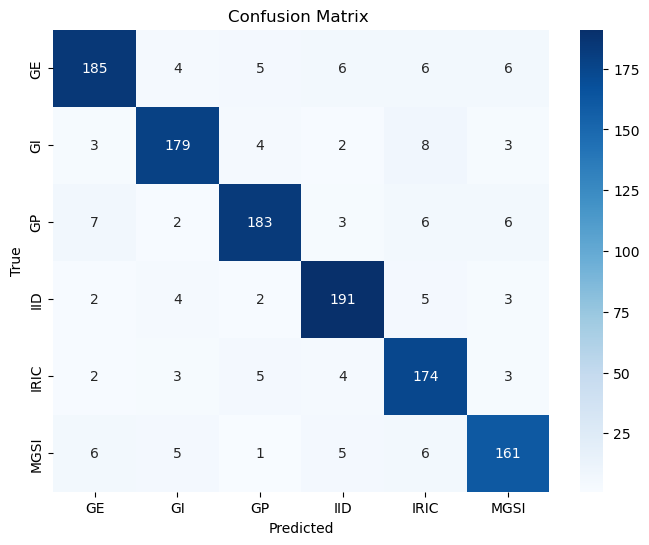

In [7]:
# Importation des librairies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du dataset
df = pd.read_csv("students_dataset6.csv")

# Préparation des données
X = df.drop("Filiere", axis=1)
y = df["Filiere"]


# Encodage des colonnes catégorielles
X_encoded = pd.get_dummies(X)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

 

# Split en training et test
X_train, X_test, y_train, y_test = train_test_split(X_encoded , y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Définir les modèles
modeldata6 = CatBoostClassifier(verbose=0, random_state=42)

modeldata6.fit(X_train, y_train)
y_pred = modeldata6.predict(X_test)
 # Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred, target_names=le.classes_)
 # Affichage
print(f"\n - 🎯 Accuracy: {acc*100:.2f}%")
print(clf_report)
    
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

 

## IV- Sauvegarde du modèle entraîné

In [123]:
 
import pickle
with open("modelCatboostbest.pkl", "wb") as file:
    pickle.dump(modeldata6, file)

print("Modèle sauvegardé avec succès !")

Modèle sauvegardé avec succès !


In [149]:
import joblib

# Sauvegarder le label encoder
joblib.dump(le, "label_encoder.pkl")

# Sauvegarder les colonnes utilisées dans X_encoded
joblib.dump(X_encoded.columns.tolist(), "X_encoded_columns.pkl")

['X_encoded_columns.pkl']